# Text Classification - Vanilla Mixture of Experts (Hard, Pretrained) Analysis

----

## $\color{blue}{Sections:}$
* Preamble
* Load Results
* Scores
* Examination
* Save

## $\color{blue}{Preamble:}$

This notebook will analyse the results of the end to end, soft, MOE model.

## $\color{blue}{Load-Results:}$


In [ ]:
from google.colab import drive
drive.mount("/content/drive")
%cd '/content/drive/MyDrive/'

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = 'class/datasets/df_dev'
df = pd.read_pickle(path)

In [ ]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book', 'vanilla_moe_e2e_soft_forest_preds',
       'vanilla_moe_e2e_soft_forest_pseudo_book',
       'vanilla_moe_hard_pre_preds'],
      dtype='object')

In [ ]:
grouped = dict(df.groupby("book_idx")['chapter_idx'].unique())

In [ ]:
pred2book = {}
for key in grouped.keys():
  chapters = grouped[key]
  for chapter in chapters:
    pred2book[chapter] = key

modify below

In [ ]:
df['vanilla_moe_hard_pre_pseudo_book'] = df['vanilla_moe_hard_pre_preds'].map(pred2book)

...saving

In [ ]:
path = 'class/datasets/'
df.to_pickle(path + 'df_dev')

In [ ]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book', 'vanilla_moe_e2e_soft_forest_preds',
       'vanilla_moe_e2e_soft_forest_pseudo_book', 'vanilla_moe_hard_pre_preds',
       'vanilla_moe_hard_pre_pseudo_book'],
      dtype='object')

## $\color{blue}{Scores:}$


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
def bar_chart(values, cats, title):

    fig, ax = plt.subplots(1,1, figsize = (12,5))

    D_color = {
        0: '0',
        1: '0.5',
        2: '0.8',
        3: 'blue',
        4: 'red',
        5: 'green'

    }

    D_label = {
        0: "Uly1",
        1: "Uly2",
        2: "Uly3",
        3: "Dub",
        4: "Drac",
        5: "Rep"
    }

    ax.bar(
        x = list(range(len(values))),
        height = values,
        color = [D_color[el] for el in cats],
        edgecolor = 'black',
        zorder= 3,
        label= [D_label[el] for el in cats]  # Create a label for the legend

    )

    ax.grid(zorder=0,
            which='both',
            axis='y',
            linewidth=0.5,
            linestyle='--'
    )

    ax.yaxis.set_major_locator(plt.MaxNLocator())  # Show integer ticks


    # Create custom legend
    handles = [plt.Rectangle((0,0),1,1, color=D_color[i]) for i in D_color]
    labels = [D_label[i] for i in range(len(D_label))]
    ax.legend(handles, labels, title="Books", loc='upper right')


    # Add title
    plt.title(title)



    # Show the plot
    plt.show()


### $\color{red}{Chapter:}$

70 class problem


modify below

In [ ]:
chapter_reals = df['chapter_idx'].to_numpy()
chapter_preds = df['vanilla_moe_hard_pre_preds'].to_numpy()

#### $\color{green}{Accuracy:}$

$\frac{1}{N}\sum_{i=1}^N (y_{true} = y_{pred})$


In [ ]:
chapter_accuracy = accuracy_score(chapter_reals, chapter_preds)
chapter_accuracy

0.5663900414937759

#### $\color{green}{Precision:}$

Proportion of predictions that are correct

$\frac{TP}{TP + FP}$

* class_precision - stat per class
* macro - average over classes
* weighted - macro weighted by class sizes
* micro - global average (count every true positive and false positive)

In [ ]:
chapter_precision = precision_score(chapter_reals, chapter_preds, average= None, zero_division=np.nan)
chapter_macro_precision = precision_score(chapter_reals, chapter_preds, average="macro", zero_division=np.nan)
chapter_weighted_precision = precision_score(chapter_reals, chapter_preds, average="weighted",zero_division=np.nan)
chapter_micro_precision = precision_score(chapter_reals, chapter_preds, average="micro",zero_division=np.nan)
print('macro precision:', chapter_macro_precision)
print('weighted precision:', chapter_weighted_precision)
print('micro precision:', chapter_micro_precision)

macro precision: 0.47645556864989125
weighted precision: 0.590391753143399
micro precision: 0.5663900414937759


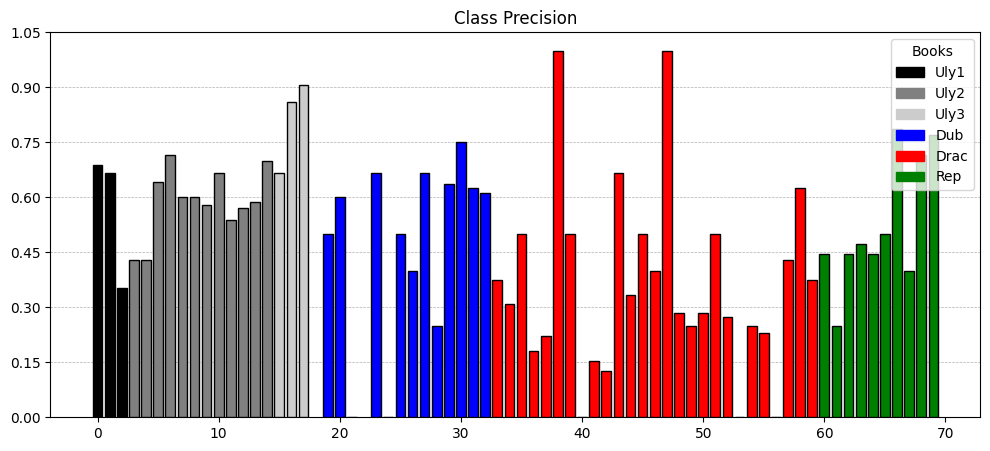

In [ ]:
vals = chapter_precision
cats = [pred2book[i] for i in range(70)]
title = "Class Precision"
bar_chart(vals, cats, title)

#### $\color{green}{Recall:}$

Proportion of reals that are true.

$\frac{TP}{TP + FN}$


In [ ]:
chapter_recall = recall_score(chapter_reals, chapter_preds, average= None, zero_division=np.nan)
chapter_macro_recall = recall_score(chapter_reals, chapter_preds, average="macro", zero_division=np.nan)
chapter_weighted_recall = recall_score(chapter_reals, chapter_preds, average="weighted",zero_division=np.nan)
chapter_micro_recall = recall_score(chapter_reals, chapter_preds, average="micro",zero_division=np.nan)
print('macro recall:', chapter_macro_recall)
print('weighted recall:', chapter_weighted_recall)
print('micro recall:', chapter_micro_recall)

macro recall: 0.457953752039256
weighted recall: 0.5663900414937759
micro recall: 0.5663900414937759


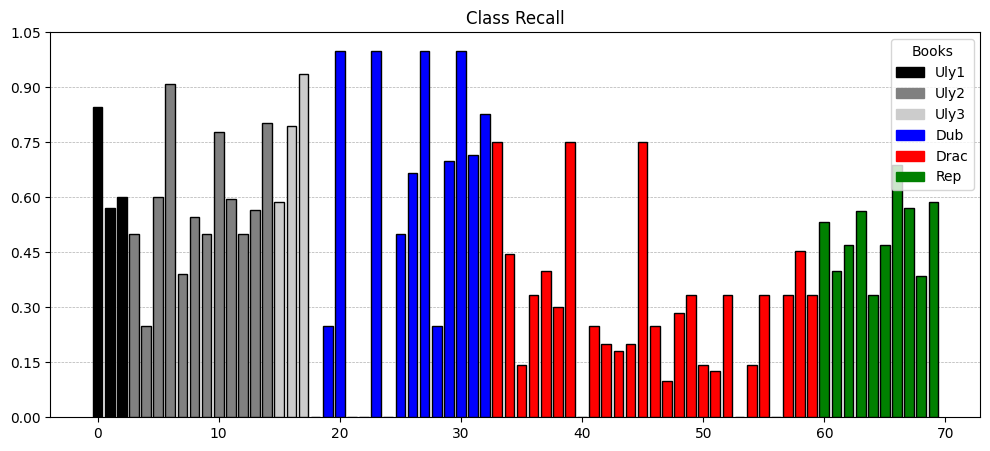

In [ ]:
vals = chapter_recall
cats = [pred2book[i] for i in range(70)]
title = "Class Recall"
bar_chart(vals, cats, title)

#### $\color{green}{F1:}$

Harmonic mean precision and recall

In [ ]:
chapter_f1 = f1_score(chapter_reals, chapter_preds, average= None, zero_division=np.nan)
chapter_macro_f1 = f1_score(chapter_reals, chapter_preds, average="macro", zero_division=np.nan)
chapter_weighted_f1 = f1_score(chapter_reals, chapter_preds, average="weighted",zero_division=np.nan)
chapter_micro_f1 = f1_score(chapter_reals, chapter_preds, average="micro",zero_division=np.nan)
print('macro f1:', chapter_macro_f1)
print('weighted f1:', chapter_weighted_f1)
print('micro f1:', chapter_micro_f1)


macro f1: 0.4364102519663397
weighted f1: 0.559260196793352
micro f1: 0.5663900414937759


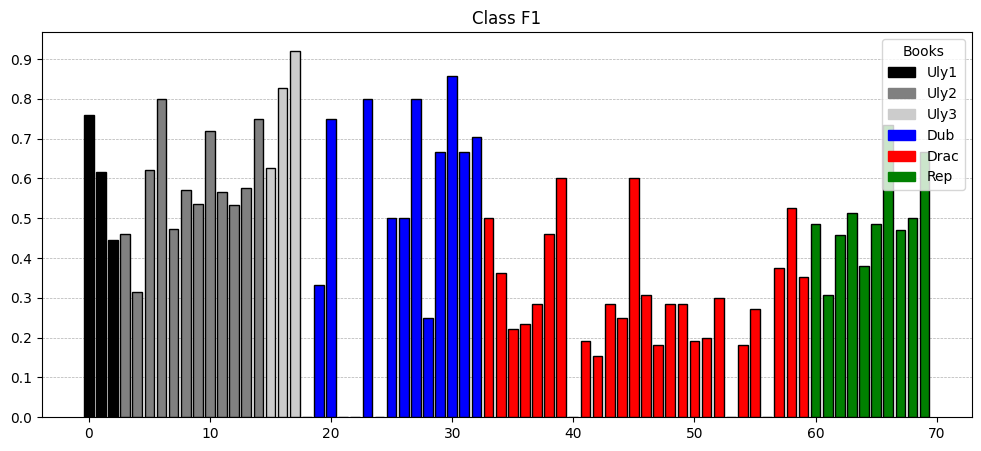

In [ ]:
vals = chapter_f1
cats = [pred2book[i] for i in range(70)]
title = "Class F1"
bar_chart(vals, cats, title)

#### $\color{green}{Confusion:}$

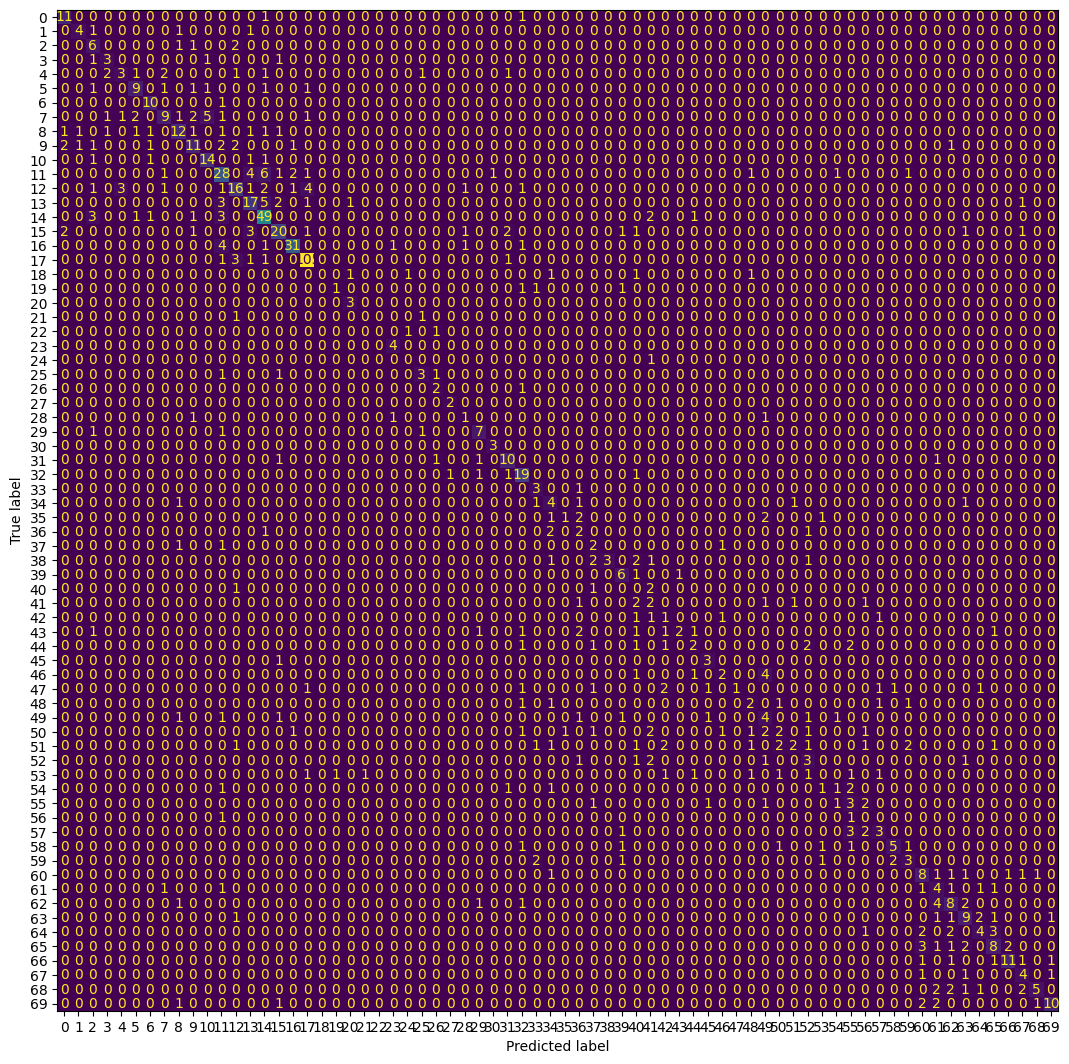

In [ ]:
cm = confusion_matrix(chapter_reals, chapter_preds)
fig, ax = plt.subplots(figsize=(13,13))
cmp = ConfusionMatrixDisplay.from_predictions(chapter_reals, chapter_preds, colorbar=False, ax=ax)


### $\color{red}{Book:}$

6 class problem

In [ ]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book', 'vanilla_moe_e2e_soft_forest_preds',
       'vanilla_moe_e2e_soft_forest_pseudo_book', 'vanilla_moe_hard_pre_preds',
       'vanilla_moe_hard_pre_pseudo_book'],
      dtype='object')

In [ ]:
book_reals = df['book_idx'].to_numpy()
book_preds = df['vanilla_moe_hard_pre_pseudo_book'].to_numpy()

#### $\color{green}{Accuracy:}$

$\frac{1}{N}\sum_{i=1}^N (y_{true} = y_{pred})$


In [ ]:
book_accuracy = accuracy_score(book_reals, book_preds)
book_accuracy

0.8578838174273858

#### $\color{green}{Precision:}$

Proportion of predictions that are correct

$\frac{TP}{TP + FP}$

* class_precision - stat per class
* macro - average over classes
* weighted - macro weighted by class sizes
* micro - global average (count every true positive and false positive)

In [ ]:
book_precision = precision_score(book_reals, book_preds, average= None, zero_division=np.nan)
book_macro_precision = precision_score(book_reals, book_preds, average="macro", zero_division=np.nan)
book_weighted_precision = precision_score(book_reals, book_preds, average="weighted",zero_division=np.nan)
book_micro_precision = precision_score(book_reals, book_preds, average="micro",zero_division=np.nan)
print('macro precision:', book_macro_precision)
print('weighted precision:', book_weighted_precision)
print('micro precision:', book_micro_precision)

macro precision: 0.8101094085987451
weighted precision: 0.8627539181166445
micro precision: 0.8578838174273858


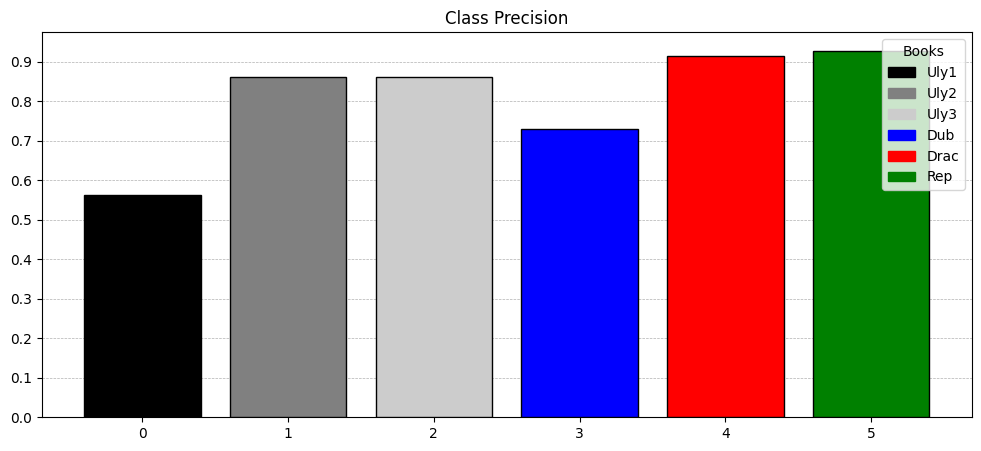

In [ ]:
vals = book_precision
cats = [i for i in range(6)]
title = "Class Precision"
bar_chart(vals, cats, title)

#### $\color{green}{Recall:}$

Proportion of reals that are true.

$\frac{TP}{TP + FN}$


In [ ]:
book_recall = recall_score(book_reals, book_preds, average= None, zero_division=np.nan)
book_macro_recall = recall_score(book_reals, book_preds, average="macro", zero_division=np.nan)
book_weighted_recall = recall_score(book_reals, book_preds, average="weighted",zero_division=np.nan)
book_micro_recall = recall_score(book_reals, book_preds, average="micro",zero_division=np.nan)
print('macro recall:', book_macro_recall)
print('weighted recall:', book_weighted_recall)
print('micro recall:', book_micro_recall)

macro recall: 0.8398261418578659
weighted recall: 0.8578838174273858
micro recall: 0.8578838174273858


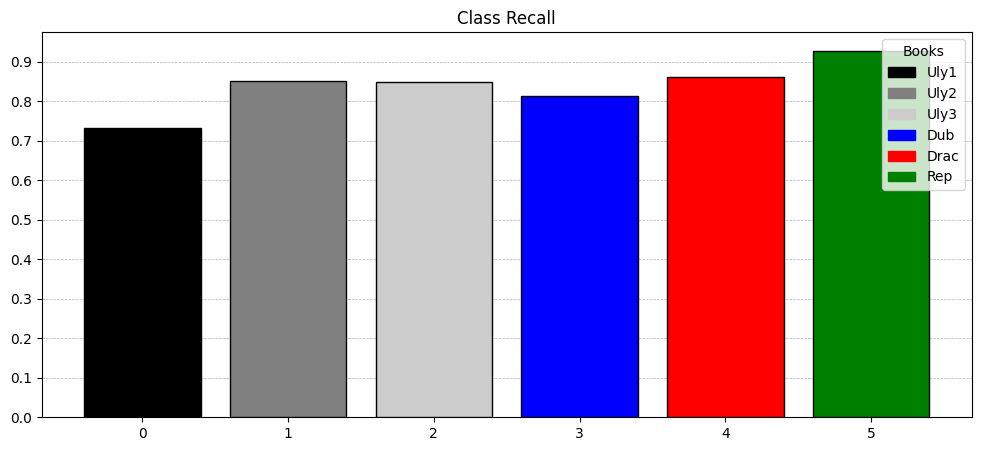

In [ ]:
vals = book_recall
cats = [i for i in range(6)]
title = "Class Recall"
bar_chart(vals, cats, title)

#### $\color{green}{F1:}$

Harmonic mean precision and recall

In [ ]:
book_f1 = f1_score(book_reals, book_preds, average= None, zero_division=np.nan)
book_macro_f1 = f1_score(book_reals, book_preds, average="macro", zero_division=np.nan)
book_weighted_f1 = f1_score(book_reals, book_preds, average="weighted",zero_division=np.nan)
book_micro_f1 = f1_score(book_reals, book_preds, average="micro",zero_division=np.nan)
print('macro f1:', book_macro_f1)
print('weighted f1:', book_weighted_f1)
print('micro f1:', book_micro_f1)

macro f1: 0.8225947278778493
weighted f1: 0.8595655498555157
micro f1: 0.8578838174273858


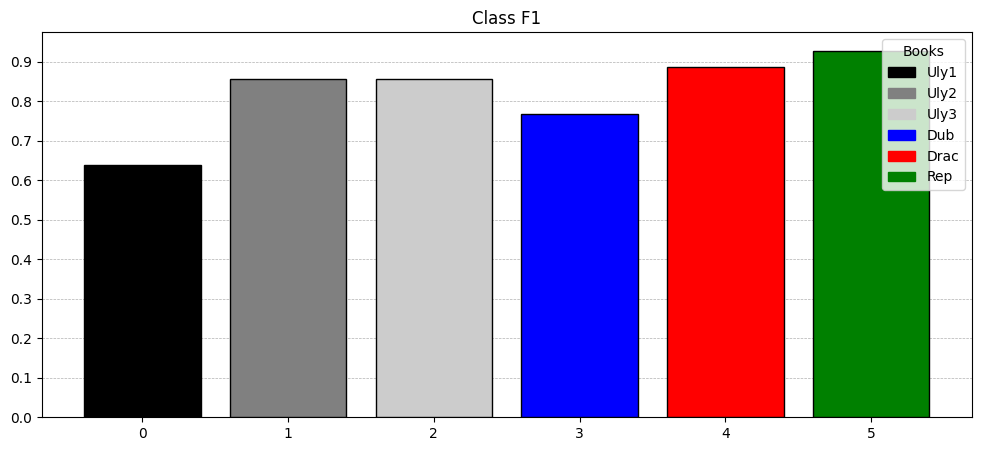

In [ ]:
vals = book_f1
cats = [i for i in range(6)]
title = "Class F1"
bar_chart(vals, cats, title)

#### $\color{green}{Confusion:}$

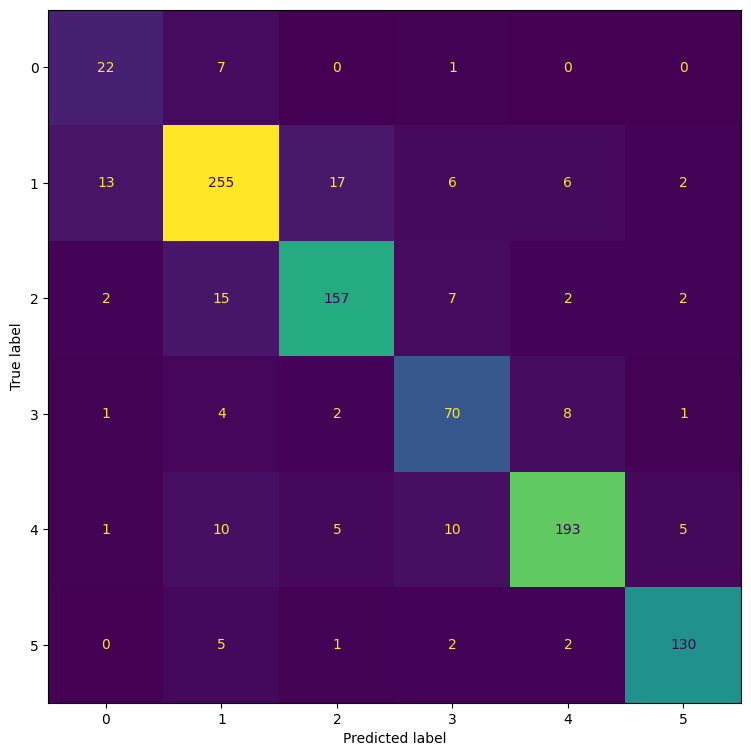

In [ ]:
fig, ax = plt.subplots(figsize=(9,9))
cmp = ConfusionMatrixDisplay.from_predictions(book_reals, book_preds, colorbar=False, ax=ax)

## $\color{blue}{Examination:}$

In [ ]:
# subset incorrect and view
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book', 'vanilla_moe_e2e_soft_forest_preds',
       'vanilla_moe_e2e_soft_forest_pseudo_book', 'vanilla_moe_hard_pre_preds',
       'vanilla_moe_hard_pre_pseudo_book'],
      dtype='object')

In [ ]:
df_wrong_book = df[df.book_idx != df.vanilla_moe_hard_pre_pseudo_book]
df_wrong_book = df_wrong_book.reset_index(drop=True)
df_wrong_book.shape

(137, 19)

In [ ]:
for i in range(10):
  ind = int(np.random.choice(df_wrong_book.shape[0],1))
  print('\n ------')
  print(f'Book: {df_wrong_book.loc[ind]["book_idx"]}, Chapter: {df_wrong_book.loc[ind]["chapter_idx"]}')
  print(df_wrong_book.loc[ind]['content'])
  print(f'Pred Book: {df_wrong_book.loc[ind]["vanilla_moe_hard_pre_pseudo_book"]}, Chapter: {df_wrong_book.loc[ind]["vanilla_moe_hard_pre_preds"]}')


 ------
Book: 2, Chapter: 16
John): the funeral (rite of Samuel): the advertisement of Alexander Keyes (Urim
Pred Book: 1, Chapter: 11

 ------
Book: 1, Chapter: 8
—O please do, sir... I shall be most pleased...   Amused Buck Mulligan mused in pleasant murmur with himself, selfnodding:   —A pleased bottom.   The turnstile.   Is that?... Blueribboned hat... Idly writing... What? Looked?...
Pred Book: 0, Chapter: 0

 ------
Book: 2, Chapter: 17
cat of nine tails a big brute like that that would attack a poor old woman to m
Pred Book: 1, Chapter: 11

 ------
Book: 4, Chapter: 49
One of them added that it was hard lines that there wasn’t any gentleman “such-like as yourself, squire,” to show some sort of appreciation of their efforts in a liquid form; another put in a rider that the thirst then generated was such that even the time which had elapsed had not completely allayed it.
Pred Book: 2, Chapter: 15

 ------
Book: 1, Chapter: 9
Muddy swinesnouts, hands, root and root, gripe and wres

<ipython-input-37-b8d33fbcfc5c>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ind = int(np.random.choice(df_wrong_book.shape[0],1))


In [ ]:
df_wrong_chapter = df[df.chapter_idx != df.vanilla_moe_hard_pre_preds]
df_wrong_chapter = df_wrong_chapter.reset_index(drop=True)
df_wrong_chapter.shape

(418, 19)

In [ ]:
for i in range(10):
  ind = int(np.random.choice(df_wrong_chapter.shape[0],1))
  print('\n ------')
  print(f'Book: {df_wrong_chapter.loc[ind]["book_idx"]}, Chapter/ {df_wrong_chapter.loc[ind]["chapter_idx"]}')
  print(df_wrong_chapter.loc[ind]['content'])
  print(f'Pred Book: {df_wrong_chapter.loc[ind]["vanilla_moe_hard_pre_pseudo_book"]}, Chapter: {df_wrong_chapter.loc[ind]["vanilla_moe_hard_pre_preds"]}')


 ------
Book: 4, Chapter/ 41
At any rate, we have proved one thing; that the spells of quietness last a reasonable time. We shall in future be able to ease his bonds for a few hours each day. I have given orders to the night attendant merely to shut him in the padded room, when once he is quiet, until an hour before sunrise.
Pred Book: 4, Chapter: 51

 ------
Book: 2, Chapter/ 16
f meteoric showers about the period of the feast of S. Lawrence (martyr, 10 August): the mon
Pred Book: 1, Chapter: 11

 ------
Book: 4, Chapter/ 38
To my left the view is cut off by a black line of roof of the old house next the abbey. The sheep and lambs are bleating in the fields away behind me, and there is a clatter of a donkey’s hoofs up the paved road below.
Pred Book: 4, Chapter: 34

 ------
Book: 4, Chapter/ 36
Will you not cover it again?” He held out the letter to me, and with a courteous bow handed me a clean envelope. I could only redirect it and hand it to him in silence. When he went out of the

<ipython-input-39-1be067da2ae0>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ind = int(np.random.choice(df_wrong_chapter.shape[0],1))


## $\color{blue}{Examination:}$

In [ ]:
D = {
    'model': ["vanilla_moe_hard_pre"],
    'params': [1308029],
    'book_accuracy' : [book_accuracy],
    'book_precision': [list(book_precision)],
    'book_macro_precision': [book_macro_precision],
    'book_weighted_precision': [book_weighted_precision],
    'book_recall': [list(book_recall)],
    'book_macro_recall': [book_macro_recall],
    'book_weighted_recall': [book_weighted_recall],
    'book_f1': [list(book_f1)],
    'book_macro_f1':[book_macro_f1],
    'book_weighted_f1': [book_weighted_f1],
        'chapter_accuracy' : [chapter_accuracy],
    'chapter_precision': [list(chapter_precision)],
    'chapter_macro_precision': [chapter_macro_precision],
    'chapter_weighted_precision': [chapter_weighted_precision],
    'chapter_recall': [list(chapter_recall)],
    'chapter_macro_recall': [chapter_macro_recall],
    'chapter_weighted_recall': [chapter_weighted_recall],
    'chapter_f1': [list(chapter_f1)],
    'chapter_macro_f1':[chapter_macro_f1],
    'chapter_weighted_f1': [chapter_weighted_f1],
}

In [ ]:
path = "class/results/"
df_res = pd.read_pickle(path + "master_results.pk")

In [ ]:
df_new = pd.DataFrame(D)

In [ ]:
df_res = pd.concat([df_res, df_new], ignore_index=True)

In [ ]:
df_res

,model,params,book_accuracy,book_precision,book_macro_precision,book_weighted_precision,book_recall,book_macro_recall,book_weighted_recall,book_f1,...,chapter_accuracy,chapter_precision,chapter_macro_precision,chapter_weighted_precision,chapter_recall,chapter_macro_recall,chapter_weighted_recall,chapter_f1,chapter_macro_f1,chapter_weighted_f1
0,vanilla,403070,0.883817,"[0.68, 0.8673469387755102, 0.8691099476439791,...",0.854691,0.882319,"[0.5666666666666667, 0.8528428093645485, 0.897...",0.836373,0.883817,"[0.6181818181818182, 0.8600337268128162, 0.882...",...,0.596473,"[0.6428571428571429, 0.8, 0.5, 0.3, 0.6, 0.714...",0.540711,0.614420,"[0.6923076923076923, 0.5714285714285714, 0.3, ...",0.502501,0.596473,"[0.6666666666666666, 0.6666666666666666, 0.375...",0.492163,0.592659
1,vanilla_moe_e2e_soft,1308029,0.879668,"[0.6, 0.872852233676976, 0.8601036269430051, 0...",0.842570,0.879652,"[0.6, 0.8494983277591973, 0.8972972972972973, ...",0.843171,0.879668,"[0.6, 0.8610169491525423, 0.8783068783068783, ...",...,0.618257,"[0.5882352941176471, 0.6666666666666666, 0.571...",0.560280,0.635325,"[0.7692307692307693, 0.5714285714285714, 0.4, ...",0.541950,0.618257,"[0.6666666666666666, 0.6153846153846154, 0.470...",0.536712,0.617050
2,vanilla_moe_e2e_hard,1308029,0.879668,"[0.6129032258064516, 0.8491803278688524, 0.857...",0.845688,0.880934,"[0.6333333333333333, 0.8662207357859532, 0.875...",0.846277,0.879668,"[0.6229508196721312, 0.8576158940397351, 0.866...",...,0.596473,"[0.6666666666666666, 0.5555555555555556, 0.4, ...",0.528659,0.612263,"[0.6153846153846154, 0.7142857142857143, 0.4, ...",0.526583,0.596473,"[0.64, 0.625, 0.4, 0.6666666666666666, 0.38095...",0.506712,0.592210
3,vanilla_moe_e2e_soft_forest,3061832,0.870332,"[0.6296296296296297, 0.8448844884488449, 0.877...",0.834169,0.869344,"[0.5666666666666667, 0.8561872909698997, 0.848...",0.826442,0.870332,"[0.5964912280701754, 0.8504983388704319, 0.862...",...,0.553942,"[0.6923076923076923, 0.5714285714285714, 0.571...",0.468744,0.565878,"[0.6923076923076923, 0.5714285714285714, 0.4, ...",0.455724,0.553942,"[0.6923076923076923, 0.5714285714285714, 0.470...",0.441130,0.549578
4,vanilla_moe_hard_pre,1308029,0.857884,"[0.5641025641025641, 0.8614864864864865, 0.862...",0.810109,0.862754,"[0.7333333333333333, 0.8528428093645485, 0.848...",0.839826,0.857884,"[0.6376811594202898, 0.8571428571428571, 0.855...",...,0.566390,"[0.6875, 0.6666666666666666, 0.352941176470588...",0.476456,0.590392,"[0.8461538461538461, 0.5714285714285714, 0.6, ...",0.457954,0.566390,"[0.7586206896551724, 0.6153846153846154, 0.444...",0.436410,0.559260


In [ ]:
path = "class/results/"
df_res.to_pickle(path + "master_results.pk")